# Parameter Tuning in xgboost

In [9]:
# https://anaconda.org/conda-forge/xgboost
# conda install -c conda-forge xgboost

In [119]:
from sklearn.metrics import confusion_matrix

In [55]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate #Additional scklearn functions
from sklearn import metrics  
from sklearn.model_selection import GridSearchCV  #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [148]:
df = pd.read_csv('./Dataset/train_modified.csv')

In [149]:
df.head()

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,37,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,30,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,34,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,28,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,31,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [150]:
# df['Existing_EMI']= np.where(df['Disbursed']==1, 111, df['Existing_EMI'])

In [16]:
target = 'Disbursed'
IDcol = 'ID'

In [31]:
predictors = [x for x in df.columns if x not in [target, IDcol]]

xgb1 = XGBClassifier(
learning_rate = 0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    sacle_pos_weight=1,
    seed=27
)

In [32]:
xgb_param = xgb1.get_xgb_params()

In [33]:
xgb_param

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'gpu_id': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 5,
 'min_child_weight': 1,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'nthread': 4,
 'sacle_pos_weight': 1,
 'seed': 27}

In [21]:
xgtrain = xgb.DMatrix(df[predictors].values, label=df[target].values)

In [25]:
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5,
            metrics='auc', early_stopping_rounds=50)

[22:57:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sacle_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:57:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sacle_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:57:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sacle_pos_weight } might not be used.

  This may not be accurate due to some parameters are 

In [28]:
xgb1.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=160, n_jobs=None, nthread=4, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              sacle_pos_weight=1, scale_pos_weight=None, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=None, verbosity=None)

In [35]:
#Fit the algorithm on the data
xgb1.fit(df[predictors], df['Disbursed'],eval_metric='auc')

[23:39:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sacle_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, sacle_pos_weight=1,
              scale_pos_weight=1, seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [37]:
#Predict training set:
dtrain_predictions = xgb1.predict(df[predictors])
dtrain_predprob = xgb1.predict_proba(df[predictors])[:,1]

In [73]:
dtrain_predprob 

array([0.00429072, 0.01065546, 0.00126193, ..., 0.03293836, 0.02956923,
       0.00234876], dtype=float32)

In [48]:
from xgboost import plot_importance


Model Report
Accuracy : 0.9887
AUC Score (Train): 0.985579


Text(0, 0.5, 'Feature Importance Score')

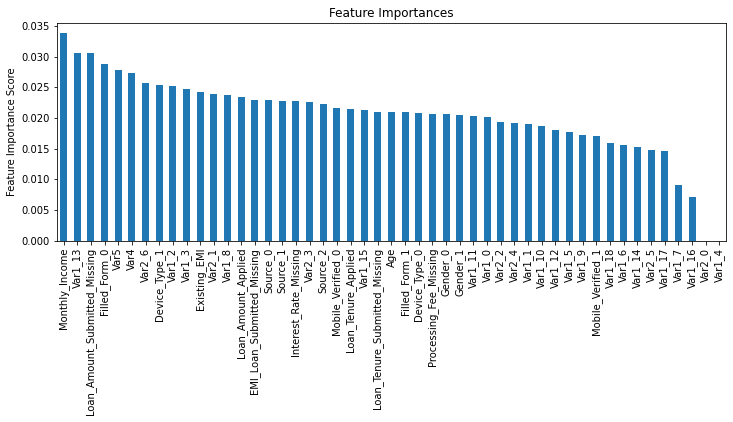

In [56]:
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(df['Disbursed'].values, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(df['Disbursed'], dtrain_predprob))
                    
feat_imp = pd.Series(xgb1.feature_importances_, index = df[predictors].columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

## Use Plot Importance Function

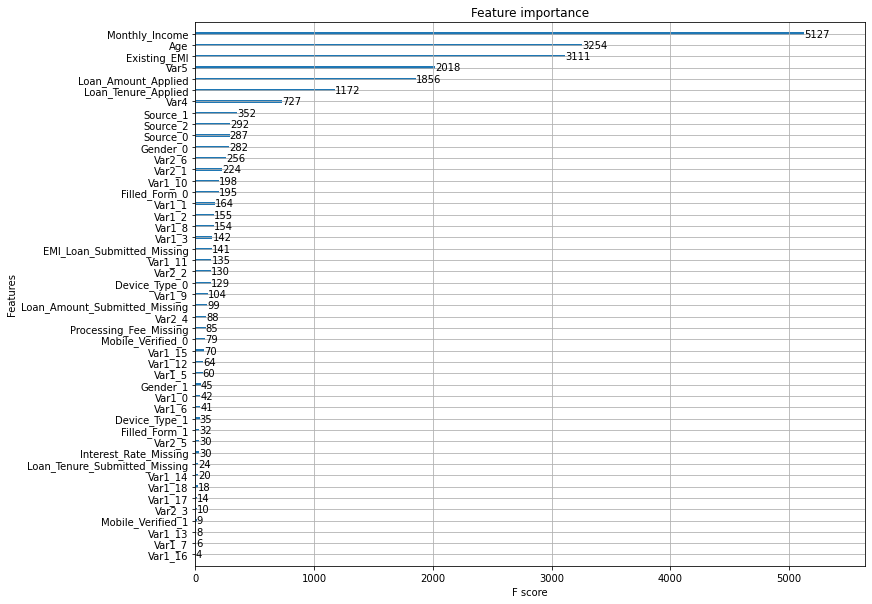

In [52]:
# plot feature importance
plot_importance(xgb1)
plt.show()

# Avoid Overfitting By Early Stopping With XGBoost In Python
https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

In [89]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [125]:
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [70]:
# Imbalanced dataset
unique, counts = np.unique(dataset[:,8], return_counts=True)
print(np.asarray((unique, counts)))

[[  0.   1.]
 [500. 268.]]


In [60]:
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [102]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_train, y_train),(X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.13619	validation_0-logloss:0.55257	validation_1-error:0.28347	validation_1-logloss:0.60491
[1]	validation_0-error:0.10895	validation_0-logloss:0.46754	validation_1-error:0.25984	validation_1-logloss:0.55934
[2]	validation_0-error:0.10506	validation_0-logloss:0.40734	validation_1-error:0.25591	validation_1-logloss:0.53068
[3]	validation_0-error:0.09144	validation_0-logloss:0.36480	validation_1-error:0.24803	validation_1-logloss:0.51795
[4]	validation_0-error:0.08560	validation_0-logloss:0.33012	validation_1-error:0.24409	validation_1-logloss:0.51153
[5]	validation_0-error:0.07782	validation_0-logloss:0.29868	validation_1-error:0.24803	validation_1-logloss:0.50935
[6]	validation_0-error:0.06809	validation_0-logloss:0.27852	validation_1-error:0.25591	validation_1-logloss:0.50818
[7]	validation_0-error:0.06615	validation_0-logloss:0.26182	validation_1-error:0.24803	validation_1-logloss:0.51097
[8]	validation_0-error:0.06226	validation_0-logloss:0.24578	validation_1

[71]	validation_0-error:0.00000	validation_0-logloss:0.03907	validation_1-error:0.26772	validation_1-logloss:0.72573
[72]	validation_0-error:0.00000	validation_0-logloss:0.03835	validation_1-error:0.26772	validation_1-logloss:0.72761
[73]	validation_0-error:0.00000	validation_0-logloss:0.03762	validation_1-error:0.26772	validation_1-logloss:0.72992
[74]	validation_0-error:0.00000	validation_0-logloss:0.03719	validation_1-error:0.26772	validation_1-logloss:0.73336
[75]	validation_0-error:0.00000	validation_0-logloss:0.03669	validation_1-error:0.26772	validation_1-logloss:0.73445
[76]	validation_0-error:0.00000	validation_0-logloss:0.03632	validation_1-error:0.26772	validation_1-logloss:0.73794
[77]	validation_0-error:0.00000	validation_0-logloss:0.03587	validation_1-error:0.27165	validation_1-logloss:0.74054
[78]	validation_0-error:0.00000	validation_0-logloss:0.03521	validation_1-error:0.26772	validation_1-logloss:0.74512
[79]	validation_0-error:0.00000	validation_0-logloss:0.03464	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
# make predictions for test data
y_pred = model.predict(X_test)
y_pred_predprob = xgb1.predict_proba(X_test)[:,1]

In [104]:
predictions = [round(value) for value in y_pred]

In [105]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.02%


In [106]:
results = model.evals_result()
print(results)

{'validation_0': {'error': [0.136187, 0.108949, 0.105058, 0.09144, 0.085603, 0.077821, 0.068093, 0.066148, 0.062257, 0.05642, 0.046693, 0.042802, 0.035019, 0.036965, 0.035019, 0.029183, 0.027237, 0.021401, 0.019455, 0.009728, 0.009728, 0.007782, 0.007782, 0.007782, 0.007782, 0.005837, 0.005837, 0.005837, 0.001946, 0.003891, 0.001946, 0.001946, 0.001946, 0.0, 0.001946, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'logloss': [0.552572, 0.467541, 0.407341, 0.364796, 0.330122, 0.298683, 0.278519, 0.261819, 0.245784, 0.232978, 0.21955, 0.210509, 0.200831, 0.194664, 0.187254, 0.177651, 0.167469, 0.158791, 0.151152, 0.145285, 0.142824, 0.139593, 0.132529, 0.127055, 0.124301, 0.12175, 0.117147, 0.112001, 0.106823, 0.1

In [107]:
len(results['validation_0']['error'])

100

In [108]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

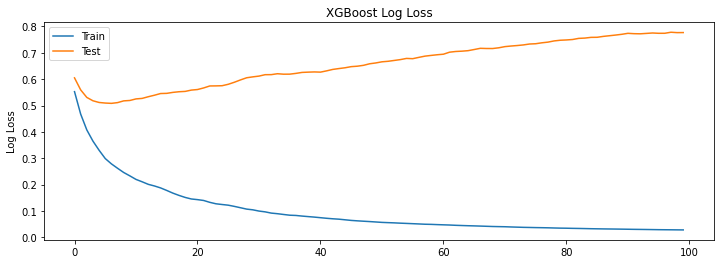

In [110]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

In [91]:
x_axis 

range(0, 100)

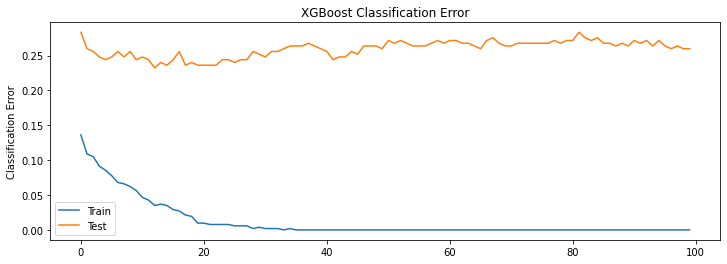

In [111]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

## Early Stopping With XGBoost
#### For example, we can check for no improvement in logarithmic loss over the 10 epochs as follows:

In [123]:
eval_set = [(X_test, y_test)]
# model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.80187
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.80871
[2]	validation_0-auc:0.81220
[3]	validation_0-auc:0.81347
[4]	validation_0-auc:0.81176
[5]	validation_0-auc:0.81263
[6]	validation_0-auc:0.81424
[7]	validation_0-auc:0.81424
[8]	validation_0-auc:0.81173
[9]	validation_0-auc:0.81156
[10]	validation_0-auc:0.81203
[11]	validation_0-auc:0.81042
[12]	validation_0-auc:0.80851
[13]	validation_0-auc:0.80535
[14]	validation_0-auc:0.80334
[15]	validation_0-auc:0.80582
[16]	validation_0-auc:0.80495
Stopping. Best iteration:
[6]	validation_0-auc:0.81424



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, predictions))

Accuracy: 74.41%
[[133  29]
 [ 36  56]]


# Data Preparation for Gradient Boosting with XGBoost in Python

### Label Encode String Class Values

In [151]:
# multiclass classification
import pandas
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load data
data = pandas.read_csv('iris.csv', header=None)

In [155]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [156]:
dataset = data.values
# split data into X and y
X = dataset[:,0:4]
Y = dataset[:,4]

In [160]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [161]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)

In [162]:
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 92.00%


* xgboost model automatically model the multiclass classification problem using the multi:softprob objective

### One Hot Encode Categorical Data

* We cannot use label encoding to encode all categorical. Because XGBoost may assume that encoded integer values for each input variable have an ordinal relationship.

In [163]:
# binary classification, breast cancer dataset, label and one hot encoded
import numpy
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [168]:
# load data
data = read_csv('breast-cancer.csv', header=None)
dataset = data.values

In [169]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [172]:
# split data into X and y
X = dataset[:,0:9]
X = X.astype(str)
Y = dataset[:,9]

In [185]:
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
	label_encoder = LabelEncoder()
	feature = label_encoder.fit_transform(X[:,i])
	feature = feature.reshape(X.shape[0], 1)
	onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
	feature = onehot_encoder.fit_transform(feature)
	if encoded_x is None:
		encoded_x = feature
		print(feature)
	else:
		encoded_x = numpy.concatenate((encoded_x, feature), axis=1)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [180]:
print("X shape: : ", encoded_x.shape)

X shape: :  (286, 43)


In [186]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 68.42%


### Support for Missing Data

In [187]:
dataframe = read_csv("horse-colic.csv", delim_whitespace=True, header=None)

In [188]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [192]:
dataset = dataframe.values
# split data into X and y
X = dataset[:,0:27]
Y = dataset[:,27]

In [195]:
# set missing values to 0
X[X == '?'] = 0

In [196]:
# convert to numeric
X = X.astype('float32')

In [197]:
# encode Y class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 82.83%


In [201]:
from sklearn.impute import SimpleImputer
# load data
dataframe = read_csv("horse-colic.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split data into X and y
X = dataset[:,0:27]
Y = dataset[:,27]
# set missing values to 0
X[X == '?'] = numpy.nan
# convert to numeric
X = X.astype('float32')
# impute missing values as the mean
imputer = SimpleImputer()
imputed_x = imputer.fit_transform(X)
# encode Y class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(imputed_x, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 81.82%


In [206]:
from sklearn.impute import SimpleImputer
# load data
dataframe = read_csv("horse-colic.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split data into X and y
X = dataset[:,0:27]
Y = dataset[:,27]
# set missing values to 0
X[X == '?'] = numpy.nan


In [210]:
X[0]

array([2.00000e+00, 1.00000e+00, 5.30101e+05, 3.85000e+01, 6.60000e+01,
       2.80000e+01, 3.00000e+00, 3.00000e+00,         nan, 2.00000e+00,
       5.00000e+00, 4.00000e+00, 4.00000e+00,         nan,         nan,
               nan, 3.00000e+00, 5.00000e+00, 4.50000e+01, 8.40000e+00,
               nan,         nan, 2.00000e+00, 2.00000e+00, 1.13000e+04,
       0.00000e+00, 0.00000e+00], dtype=float32)

In [211]:
# convert to numeric
X = X.astype('float32')
# # impute missing values as the mean
# imputer = SimpleImputer()
# imputed_x = imputer.fit_transform(X)
# encode Y class values as integers

In [212]:
X[0]

array([2.00000e+00, 1.00000e+00, 5.30101e+05, 3.85000e+01, 6.60000e+01,
       2.80000e+01, 3.00000e+00, 3.00000e+00,         nan, 2.00000e+00,
       5.00000e+00, 4.00000e+00, 4.00000e+00,         nan,         nan,
               nan, 3.00000e+00, 5.00000e+00, 4.50000e+01, 8.40000e+00,
               nan,         nan, 2.00000e+00, 2.00000e+00, 1.13000e+04,
       0.00000e+00, 0.00000e+00], dtype=float32)

In [208]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(imputed_x, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 81.82%


### How to Configure XGBoost for Imbalanced Classification

In [232]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [247]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=7)

In [248]:
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'y':y})

In [249]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [250]:
df['y'].value_counts()

0    9900
1     100
Name: y, dtype: int64

<AxesSubplot:xlabel='x1', ylabel='x2'>

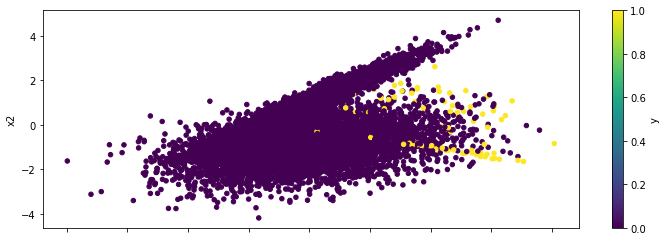

In [251]:
df.plot.scatter(x='x1', y='x2',c='y',colormap='viridis')

#### XGBoost Model for Classification

In [252]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [253]:
# define model
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.96064


#### Weighted XGBoost for Class Imbalance

In [254]:
# define model
model = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.95700


#### Tune the Class Weighting Hyperparameter

In [255]:
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

In [256]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)

In [257]:
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960640 using {'scale_pos_weight': 1}
0.960640 (0.019469) with: {'scale_pos_weight': 1}
0.959609 (0.020394) with: {'scale_pos_weight': 10}
0.958532 (0.022358) with: {'scale_pos_weight': 25}
0.958027 (0.023927) with: {'scale_pos_weight': 50}
0.957044 (0.023125) with: {'scale_pos_weight': 75}
0.957003 (0.024195) with: {'scale_pos_weight': 99}
0.956012 (0.026275) with: {'scale_pos_weight': 100}
0.942141 (0.034488) with: {'scale_pos_weight': 1000}


### Feature Importance and Feature Selection With XGBoost in Python

In [258]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Accuracy: 74.02%
Thresh=0.088, n=8, Accuracy: 74.02%
Thresh=0.089, n=7, Accuracy: 71.65%
Thresh=0.098, n=6, Accuracy: 71.26%
Thresh=0.098, n=5, Accuracy: 74.41%
Thresh=0.100, n=4, Accuracy: 74.80%
Thresh=0.136, n=3, Accuracy: 71.26%
Thresh=0.152, n=2, Accuracy: 71.26%
Thresh=0.240, n=1, Accuracy: 67.32%


In [261]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [259]:
thresholds = sort(model.feature_importances_)

In [260]:
thresholds

array([0.08799455, 0.08907107, 0.09801765, 0.09824965, 0.09959184,
       0.13577047, 0.15170811, 0.23959671], dtype=float32)

## Xgboost Feature Importance Computed in 3 Ways with Python